In [23]:
from PIL import Image, ImageOps
from pathlib import Path
from typing import Optional
from matplotlib import pyplot as plt
import logging

In [24]:
TILE_SIZE = 1650 # in pixels
# NOTE: TILE_SIZE 
BORDER_SIZE = 200  # in pixels
BORDER_COLOR = (255, 255, 255)
BACKGROUND_COLOR = (255, 255, 255)
IMAGE_DIR = Path("board/aruco_600x600")

# Define the layout grid (rows of indices, None for empty)
# fmt: off
layout:list[list[Optional[int]]] = [
    [None, None, 0, None, None],
    [None, None, 1, None, None],
    [None,    4, 2,    5, None],
    [None, None, 3, None, None],
]
# fmt: on



# charuco_410x410_3x3_s133_m105_face3_no_12_DICT_7X7_1000
# xxxxxxx_<phy_size>_<grid_size>_<checker_size>_<marker_space>_face<face_idx>_no_<no_idx>_DICT_<dict_size>
# 0        1          2           3              4              5             6   7             8
def parse_filename_to_face_idx(filename: str):
    parts = filename.split("_")
    return int(parts[5][len("face") :])


image_pathes = list(IMAGE_DIR.glob("*.png"))
image_indice = map(lambda p: parse_filename_to_face_idx(p.stem), image_pathes)
images = {k: v for k, v in zip(image_indice, image_pathes)}
display(images)

{1: PosixPath('board/aruco_600x600/aruco_board_600x600_border75_m450_face1_id22_DICT_APRILTAG_36h11.png'),
 4: PosixPath('board/aruco_600x600/aruco_board_600x600_border75_m450_face4_id25_DICT_APRILTAG_36h11.png'),
 3: PosixPath('board/aruco_600x600/aruco_board_600x600_border75_m450_face3_id24_DICT_APRILTAG_36h11.png'),
 2: PosixPath('board/aruco_600x600/aruco_board_600x600_border75_m450_face2_id23_DICT_APRILTAG_36h11.png'),
 5: PosixPath('board/aruco_600x600/aruco_board_600x600_border75_m450_face5_id26_DICT_APRILTAG_36h11.png'),
 0: PosixPath('board/aruco_600x600/aruco_board_600x600_border75_m450_face0_id21_DICT_APRILTAG_36h11.png')}

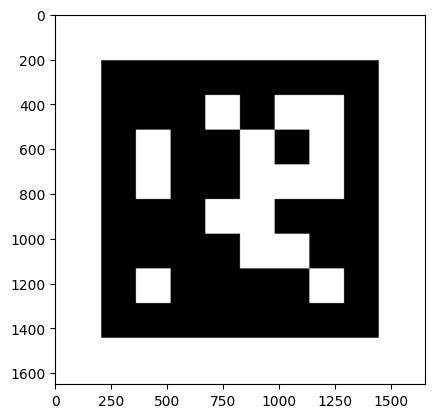

In [25]:
tile = Image.open(images[0])
plt.imshow(tile)

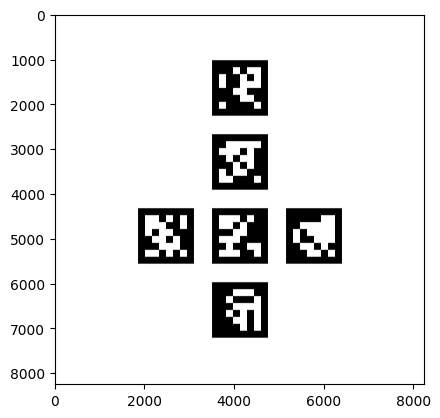

In [26]:
# Create blank canvas
rows = len(layout)
cols = len(layout[0])
canvas = Image.new("RGB", (cols * TILE_SIZE, rows * TILE_SIZE), BACKGROUND_COLOR)

# Paste tiles
for y, row in enumerate(layout):
    for x, idx in enumerate(row):
        if idx is not None:
            path = images.get(idx)
            if path is not None:
                tile = Image.open(path)
                # for the face index 4, rotate the tile 180 degrees
                # if idx == 4:
                #     tile = tile.rotate(180)
                ## note: not sure why did I did that
                canvas.paste(tile, (x * TILE_SIZE, y * TILE_SIZE))
            else:
                logging.warning(f"Missing: {idx}")

# Calculate canvas size (before border)
canvas_width = cols * TILE_SIZE
canvas_height = rows * TILE_SIZE

# Determine target size to make it square after padding
target_size = max(canvas_width, canvas_height)
extra_padding = target_size - canvas_height
top_pad = extra_padding // 2
bottom_pad = extra_padding - top_pad

# First add vertical padding to center the layout
canvas_with_border = ImageOps.expand(
    canvas,
    border=(0, top_pad, 0, bottom_pad),  # (left, top, right, bottom)
    fill=BACKGROUND_COLOR,
)

plt.imshow(canvas_with_border)
plt.show()

In [27]:
canvas_with_border.save("merged_uv_layout.png")